# Problem Statement 
Predict whether a passenger on the Titanic survived or not.

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the Data

In [24]:
data = pd.read_csv("Titanic-Dataset.csv")

In [25]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [26]:
data.shape

(891, 12)

In [27]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
data.duplicated().sum()

0

In [31]:
data["Survived"].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [32]:
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [33]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [34]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

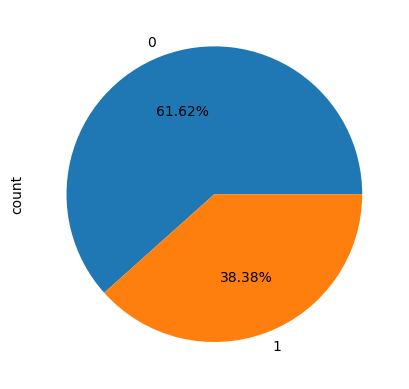

In [35]:
data["Survived"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

<Axes: ylabel='count'>

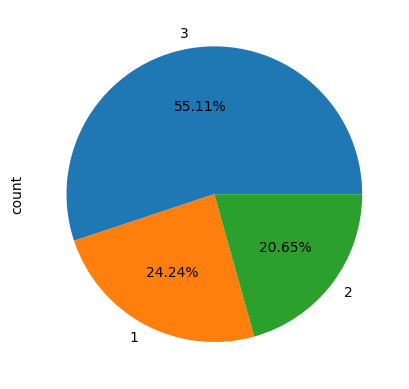

In [36]:
data["Pclass"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

<Axes: ylabel='count'>

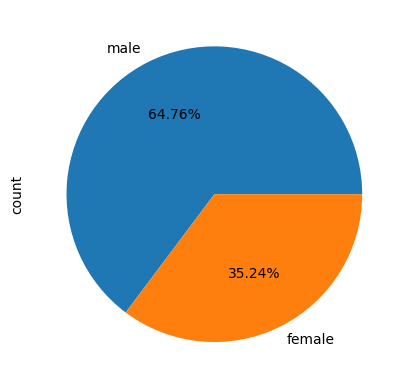

In [37]:
data["Sex"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

<Axes: ylabel='count'>

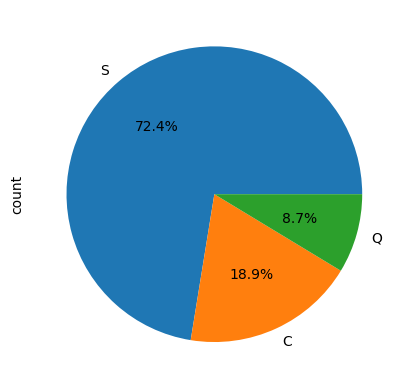

In [38]:
data["Embarked"].value_counts().plot(kind = 'pie', autopct="%0.1f%%")

In [39]:
# plt.figure(figsize=(12,12))
# sns.heatmap(data.corr(), annot = True, fmt ="0.2f")

<Axes: ylabel='Age'>

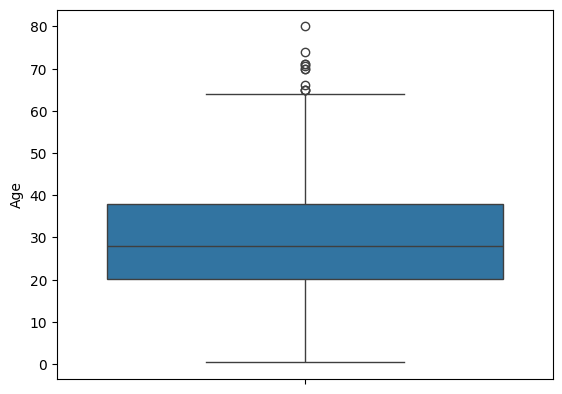

In [40]:
sns.boxplot(y = "Age", data = data)

<Axes: title={'center': 'Count of Passengers by Survived'}, ylabel='count'>

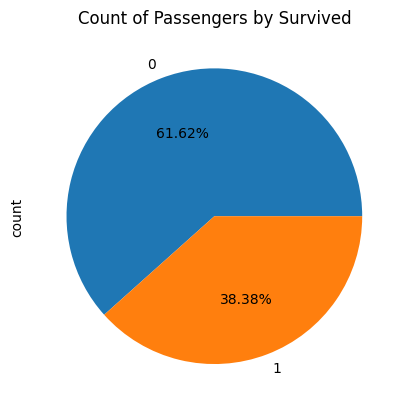

In [41]:

plt.title("Count of Passengers by Survived")
data["Survived"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")

Text(0.5, 1.0, 'Count of Passengers by Pclass')

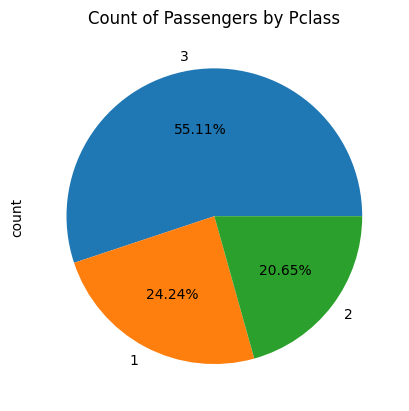

In [42]:
data["Pclass"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")
plt.title("Count of Passengers by Pclass")

Text(0.5, 1.0, 'Count of Passengers by Survived and Pclass')

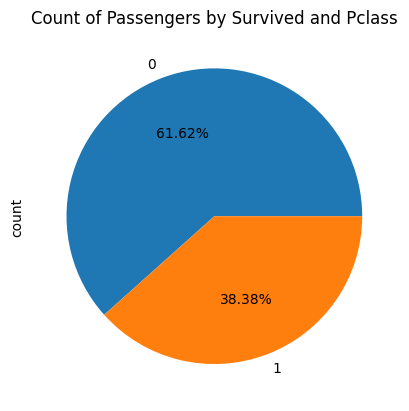

In [43]:
data["Survived"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")
plt.title("Count of Passengers by Survived and Pclass")

Text(0.5, 1.0, 'Count of Passengers by Survived and Embarked')

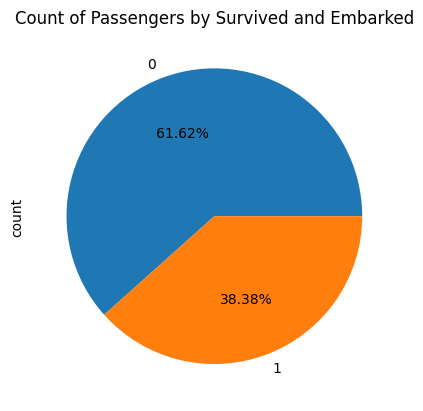

In [44]:
data["Survived"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")
plt.title("Count of Passengers by Survived and Embarked")

Text(0.5, 1.0, 'Count of Passengers by Survived and Sex')

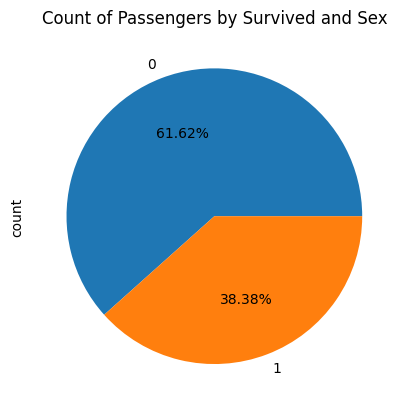

In [45]:
data["Survived"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")
plt.title("Count of Passengers by Survived and Sex")

Text(0, 0.5, 'Frequency')

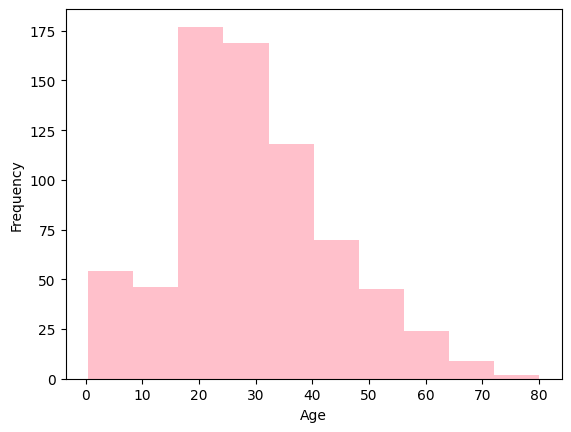

In [46]:
plt.hist(data["Age"], color = "pink")
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

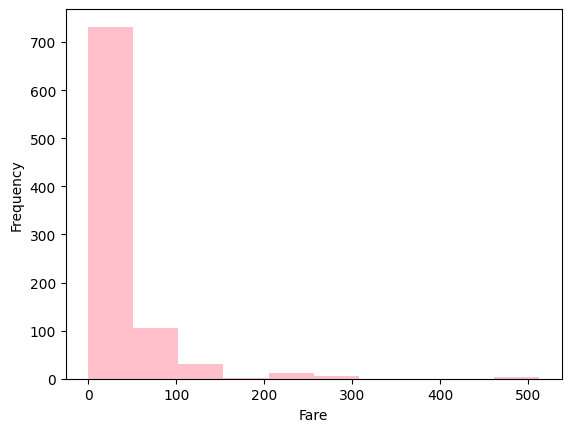

In [47]:
plt.hist(data["Fare"], color = "pink")
plt.xlabel("Fare")
plt.ylabel("Frequency")

# Removing Unneeded Columns 

In [48]:
data = data.drop(["PassengerId", "Name", "Ticket"], axis = 1)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


# Data Preprocessing 

In [49]:
minmax = MinMaxScaler()
data['Fare'] = minmax.fit_transform(data[["Fare"]])

In [50]:
data["Age"] = data["Age"].fillna(data['Age'].median())
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [51]:
data["Age"] = minmax.fit_transform(data[["Age"]])

In [52]:
# 0 - Do not have a Cabin 
# 1 - Have a Cabin 
data['Cabin'] = data['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

In [53]:

data["Survived"].value_counts().plot(kind = 'pie', autopct="%0.2f%%")
plt.title("Count of Passengers by Survived and Cabin")

In [54]:
dummies = pd.get_dummies(data[["Sex", "Embarked"]])
dummies

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,False,False,True
4,False,True,False,False,True
...,...,...,...,...,...
886,False,True,False,False,True
887,True,False,False,False,True
888,True,False,False,False,True
889,False,True,True,False,False


In [55]:
data = pd.concat([data, dummies], axis = 1)

In [56]:
data = data.drop(["Sex","Embarked"], axis = 1)

<Axes: >

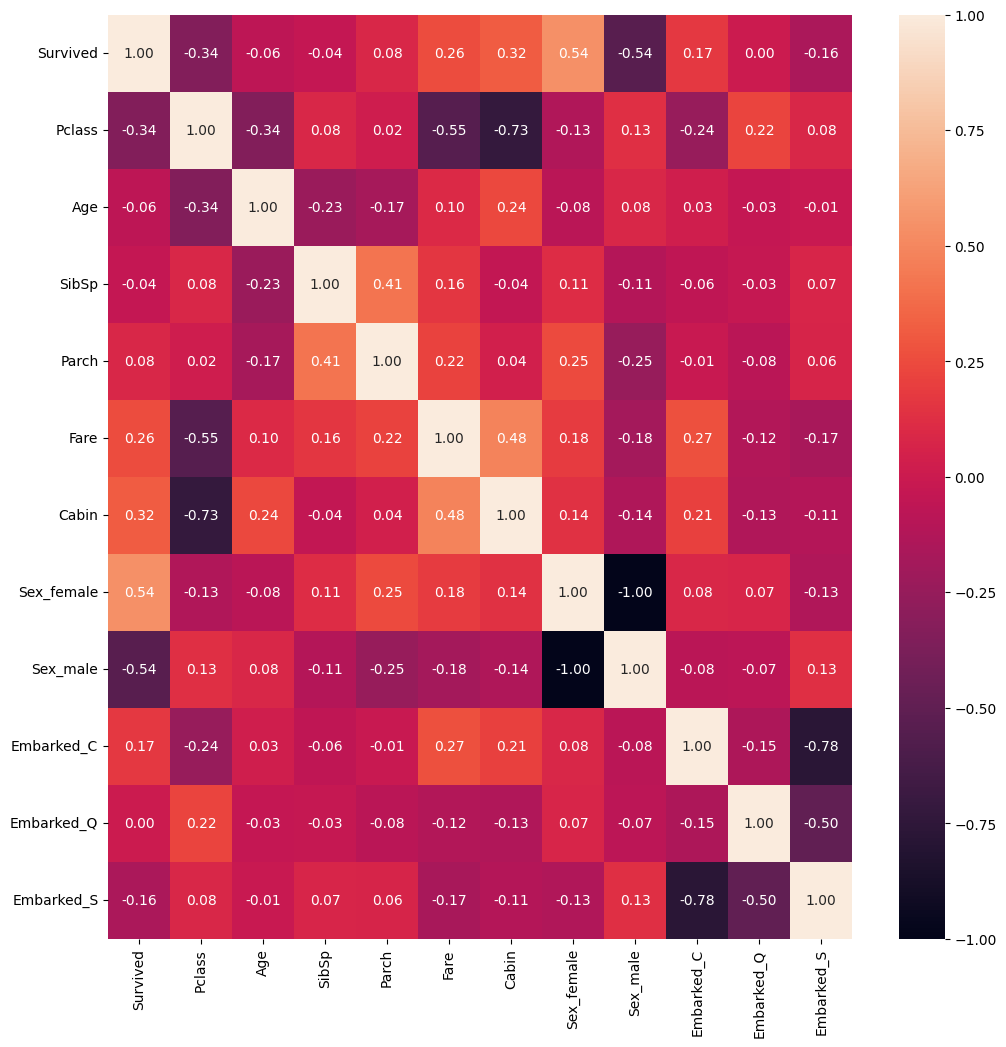

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True, fmt ="0.2f")

In [58]:
data.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Splitting Data: Training and Test Sets

In [59]:
X = data[["Pclass", "Sex_male", "Sex_female", "Age", "SibSp", "Parch", "Cabin", "Embarked_C","Embarked_S","Embarked_Q"]]
y = data['Survived']
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state  = 45) 

# Random Forest Classifer

Score of training set 0.9241573033707865
Score of testing set 0.8491620111731844


Classicication Report                precision    recall  f1-score   support

           0       0.89      0.87      0.88       117
           1       0.77      0.81      0.79        62

    accuracy                           0.85       179
   macro avg       0.83      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



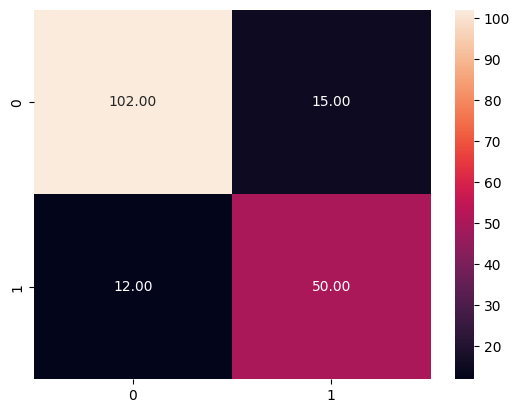

In [60]:
pipe1 = RandomForestClassifier(n_estimators = 10)
pipe1.fit(X_train, y_train)
print("Score of training set",pipe1.score(X_train, y_train))
print("Score of testing set", pipe1.score(X_test, y_test))
y_pred = pipe1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt ="0.2f")

print("Classicication Report ",classification_report(y_test, pipe1.predict(X_test)))